In [95]:
# Data
image_path = 'paintings/0.png'
image_height_mm = 970

baguette_path = 'baguettes/0.jpg'
baguette_height_mm = 93

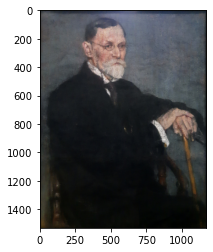

In [96]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

painting = Image.open(image_path, 'r')
imshow(np.asarray(painting))

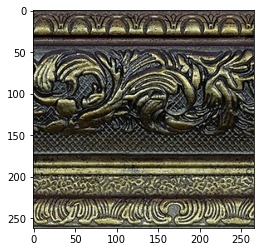

In [97]:
baguette = Image.open(baguette_path, 'r')
imshow(np.asarray(baguette))

In [98]:
baguette_real_scale = image_height_mm / baguette_height_mm
baguette_real_scale

10.43010752688172

In [99]:
baguette_image_scale = painting.height / baguette.height
baguette_image_scale

5.843511450381679

In [100]:
baguette_scale = baguette_image_scale / baguette_real_scale
baguette_scale

0.5602541906036043

In [101]:
baguette_scaled = baguette.resize((int(baguette.width * baguette_scale), int(baguette.height * baguette_scale)))
baguette_scaled.size

(149, 146)

# Get Rotated Baguette

In [102]:
baguette_s = baguette_scaled
baguette_e = baguette_scaled.rotate(90)
baguette_n = baguette_scaled.rotate(180)
baguette_w = baguette_scaled.rotate(270)

In [103]:
result_width = baguette_w.width + painting.width + baguette_e.width
result_height = baguette_n.height + painting.height + baguette_s.height
result_width, result_height

(1469, 1823)

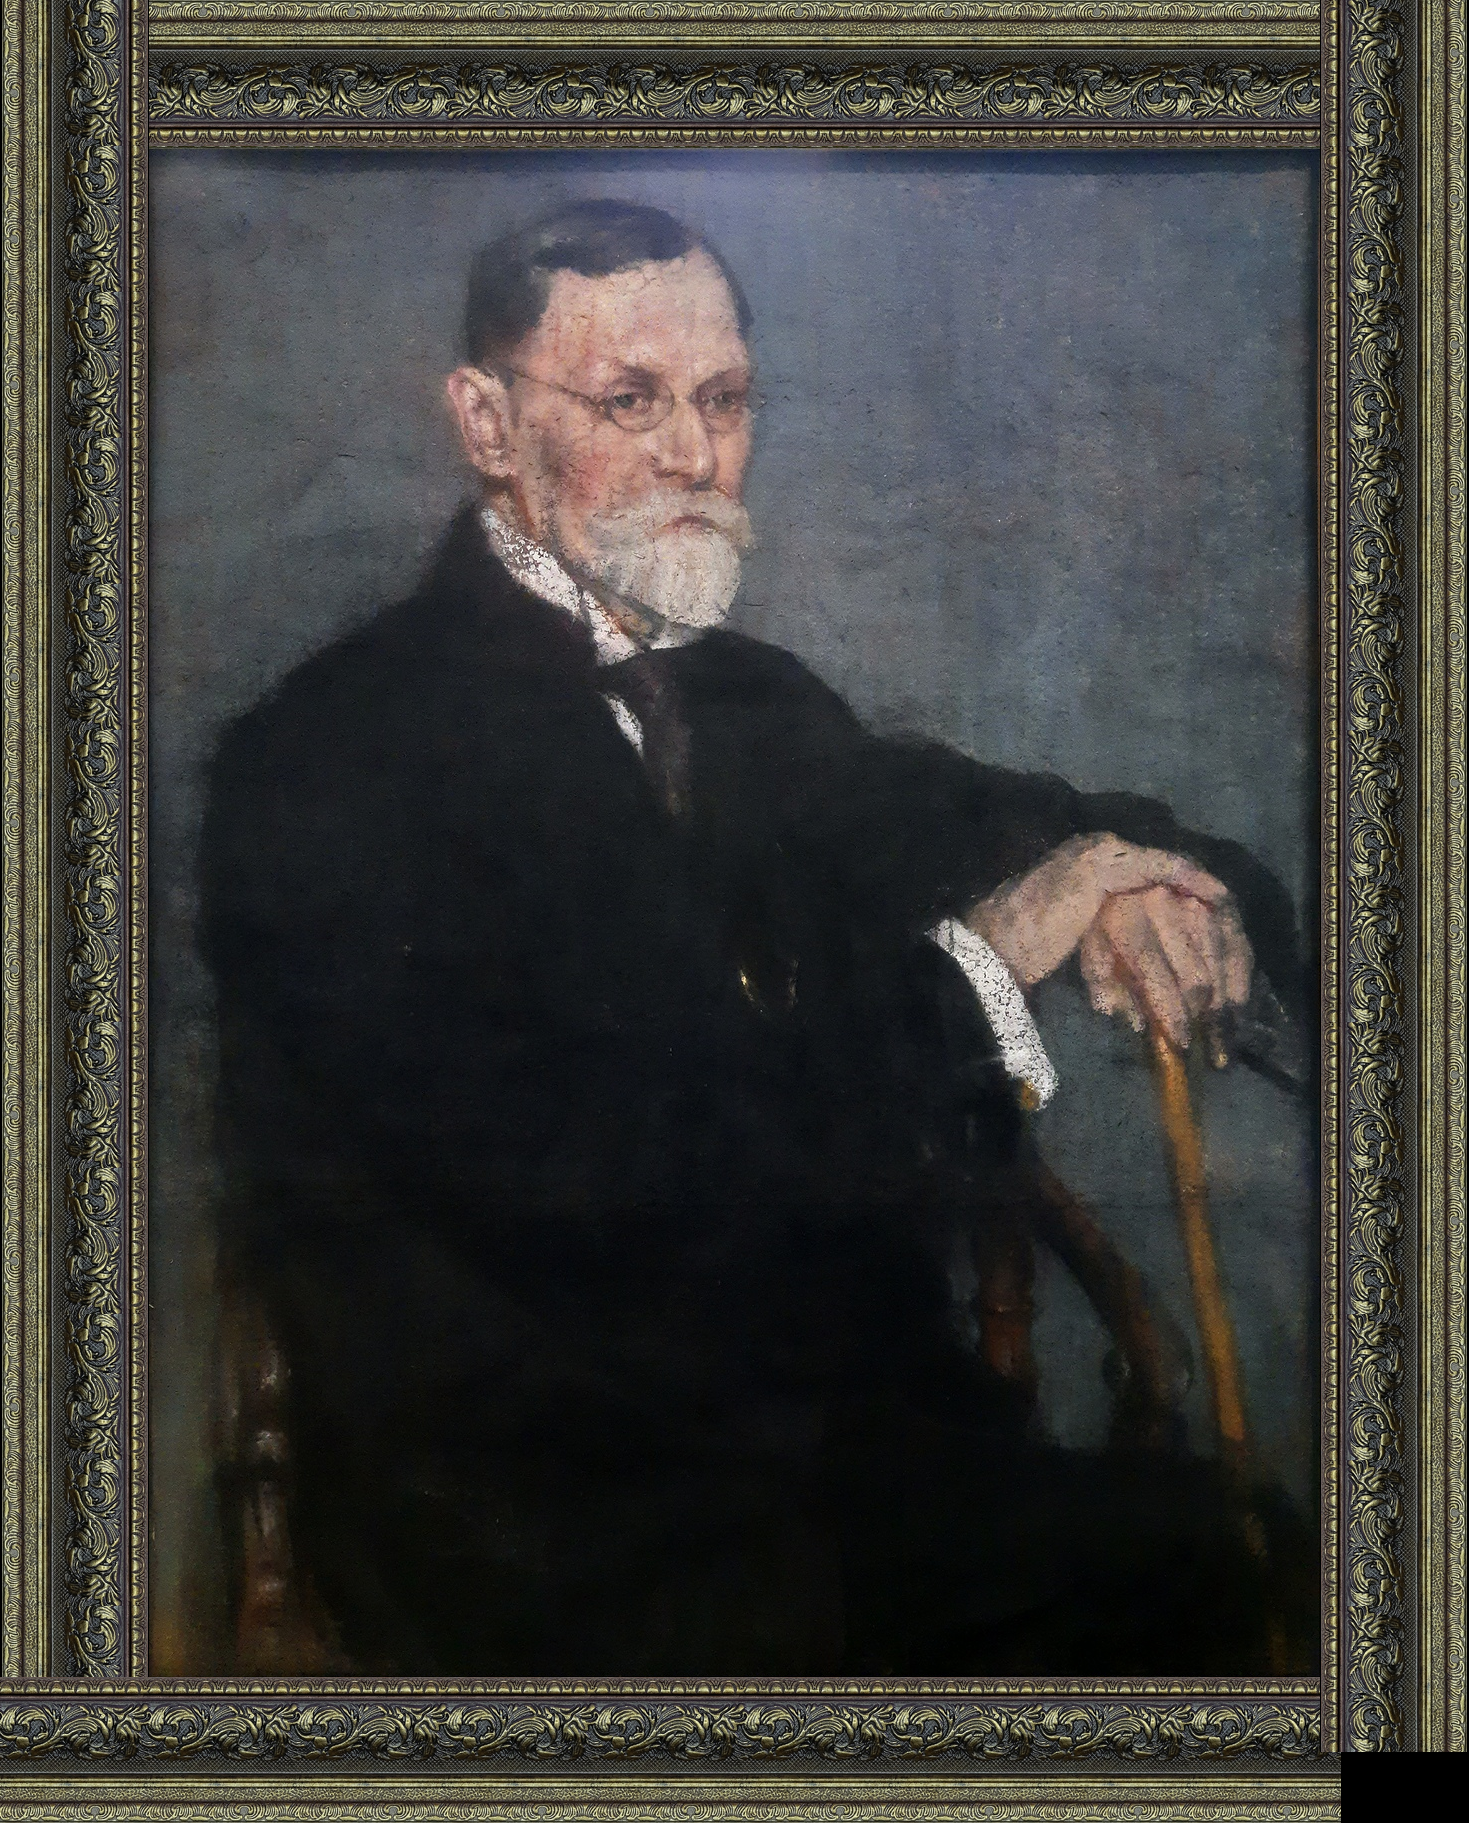

In [104]:
result = Image.new('RGB', (result_width, result_height))
result.paste(baguette_n)

for i in range(int(result_width / baguette_n.width)):
    result.paste(baguette_n, (i * baguette_n.width, 0))

for i in range(int(result_height / baguette_w.height)):
    result.paste(baguette_w, (0, i * baguette_w.height))

for i in range(int(result_width / baguette_s.width)):
    result.paste(baguette_s, (i * baguette_s.width, result_height - baguette_s.height))

for i in range(int(result_height / baguette_e.height)):
    result.paste(baguette_e, (result_width - baguette_e.width, i * baguette_e.height))

result.paste(painting, (baguette_e.width, baguette_n.height))

result